Epoch 1/10
18/18 - 10s - loss: 0.0240 - 10s/epoch - 528ms/step
Epoch 2/10
18/18 - 1s - loss: 0.0180 - 750ms/epoch - 42ms/step
Epoch 3/10
18/18 - 1s - loss: 0.0148 - 1s/epoch - 73ms/step
Epoch 4/10
18/18 - 1s - loss: 0.0138 - 1s/epoch - 76ms/step
Epoch 5/10
18/18 - 1s - loss: 0.0130 - 1s/epoch - 77ms/step
Epoch 6/10
18/18 - 1s - loss: 0.0131 - 717ms/epoch - 40ms/step
Epoch 7/10
18/18 - 1s - loss: 0.0123 - 784ms/epoch - 44ms/step
Epoch 8/10
18/18 - 1s - loss: 0.0130 - 776ms/epoch - 43ms/step
Epoch 9/10
18/18 - 1s - loss: 0.0130 - 693ms/epoch - 38ms/step
Epoch 10/10
18/18 - 1s - loss: 0.0121 - 745ms/epoch - 41ms/step
5/5 [==============================] - 2s 13ms/step
Root mean squared error: 0.001609915667545687


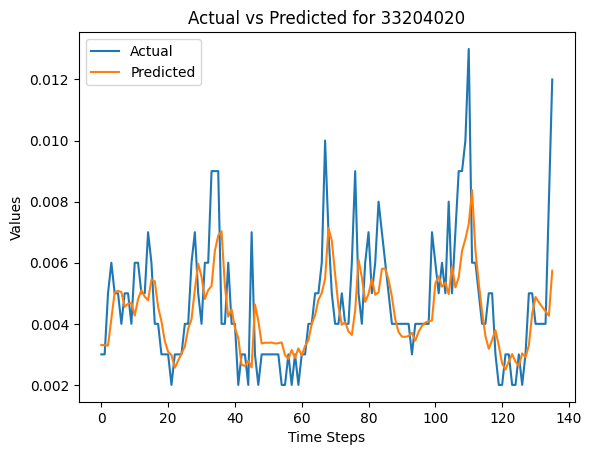

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset = pd.read_csv('/content/so2_20180101_20231031 (1).csv')

# Choose the column for prediction
selected_column = '33204020'

# Split the data into training and testing sets (80/20 split)
train_data, test_data = train_test_split(dataset[selected_column], test_size=0.2, shuffle=False)

# Define the function to create the dataset
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps)]
        dataX.append(a)
        dataY.append(dataset[i + time_steps])
    return np.array(dataX), np.array(dataY)

# Prepare the training and test data
time_steps = 10
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))
X_train, y_train = create_dataset(train_data_scaled, time_steps)
X_test, y_test = create_dataset(test_data_scaled, time_steps)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f"Root mean squared error: {rmse}")

# Plot the results
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title(f'Actual vs Predicted for {selected_column}')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.show()
